In [11]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.morphology as morph

from skimage import io, data, filters, img_as_float, img_as_ubyte, transform
from skimage.color import rgb2gray, gray2rgb, rgb2hsv
from skimage.filters.rank import mean, median, maximum, minimum
from skimage.morphology import cube, ball, square, disk, diamond, rectangle
from skimage.restoration import (denoise_tv_chambolle,  denoise_bilateral, 
                                 denoise_wavelet)
from skimage.exposure import adjust_gamma
from scipy.signal import convolve2d

plt.rcParams['image.cmap']= 'gray'

## A. Filters and Convolution

In [2]:
camera = img_as_float(data.camera())
coins = img_as_float(data.coins())

In [3]:
filter_a = np.ones((3, 3))*-1
filter_a[1] = 2
print(filter_a)

filter_b = np.ones((3, 3))*-1
filter_b[[0,1,2], [2,1,0]] = 2
print(filter_b)

filter_c = np.ones((3,3))*-1
filter_c[1, 1] = 8
print(filter_c)

filter_d = np.zeros((3, 3))
filter_d[[0,2], 0] = -1
filter_d[[0,2], 2] = 1
filter_d[1, [0,2]] = [-2, 2]
print(filter_d)

filter_e = np.zeros((3, 3))
filter_e[[0,2], 1] = -1
filter_e[1, [0,2]] = 1
print(filter_e)

[[-1. -1. -1.]
 [ 2.  2.  2.]
 [-1. -1. -1.]]
[[-1. -1.  2.]
 [-1.  2. -1.]
 [ 2. -1. -1.]]
[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]
[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]
[[ 0. -1.  0.]
 [ 1.  0.  1.]
 [ 0. -1.  0.]]


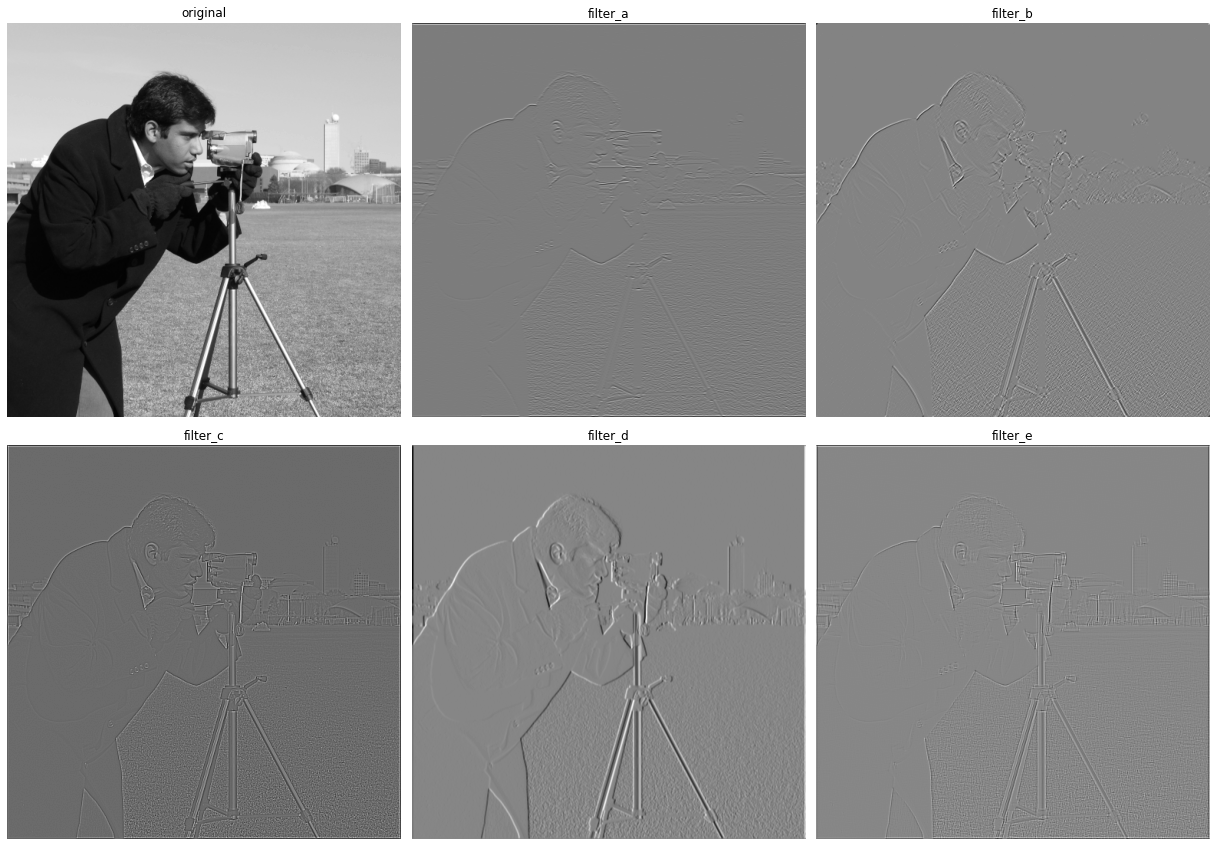

In [4]:
camera_a = convolve2d(camera, filter_a)
camera_b = convolve2d(camera, filter_b)
camera_c = convolve2d(camera, filter_c)
camera_d = convolve2d(camera, filter_d)
camera_e = convolve2d(camera, filter_e)

fig, ax = plt.subplots(2, 3, figsize=(17, 12))

ax[0,0].imshow(camera)
ax[0,0].set_title('original')
ax[0,0].axis('off')

ax[0,1].imshow(camera_a)
ax[0,1].set_title('filter_a')
ax[0,1].axis('off')

ax[0,2].imshow(camera_b)
ax[0,2].set_title('filter_b')
ax[0,2].axis('off')

ax[1,0].imshow(camera_c)
ax[1,0].set_title('filter_c')
ax[1,0].axis('off')

ax[1,1].imshow(camera_d)
ax[1,1].set_title('filter_d')
ax[1,1].axis('off')

ax[1,2].imshow(camera_e)
ax[1,2].set_title('filter_e')
ax[1,2].axis('off')

plt.tight_layout()
plt.show()

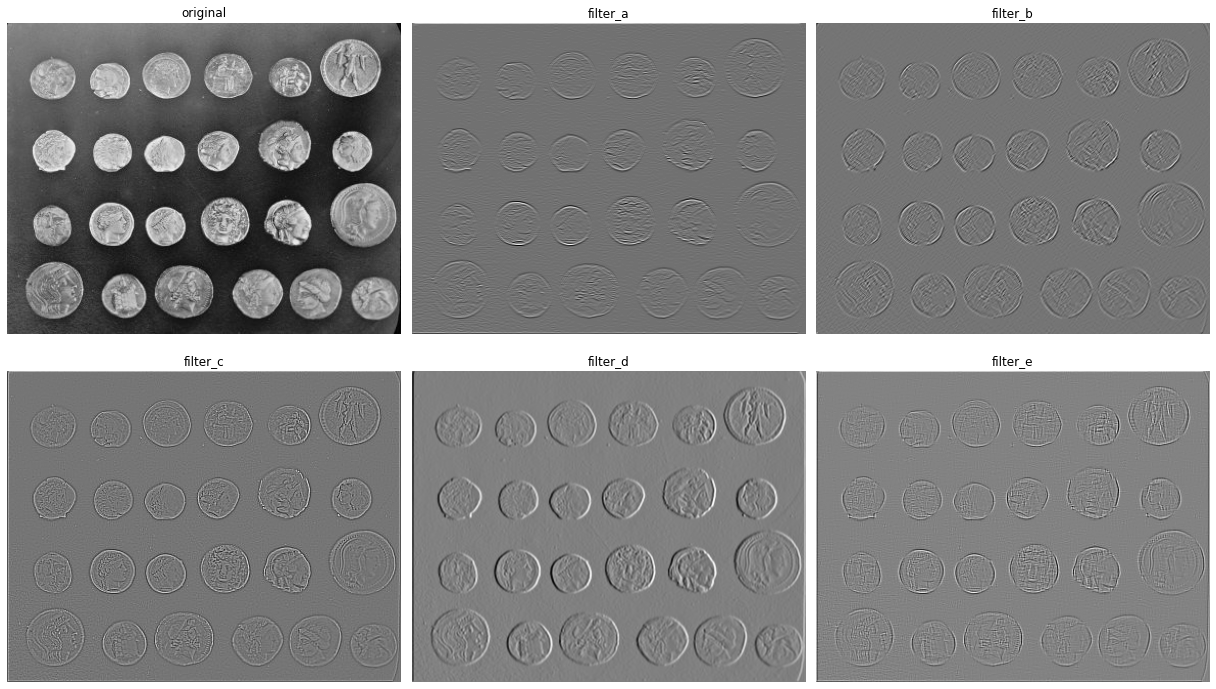

In [5]:
fig, ax = plt.subplots(2, 3, figsize=(17, 10))

coins_a = convolve2d(coins, filter_a)
coins_b = convolve2d(coins, filter_b)
coins_c = convolve2d(coins, filter_c)
coins_d = convolve2d(coins, filter_d)
coins_e = convolve2d(coins, filter_e)

ax[0,0].imshow(coins)
ax[0,0].set_title('original')
ax[0,0].axis('off')

ax[0,1].imshow(coins_a)
ax[0,1].set_title('filter_a')
ax[0,1].axis('off')

ax[0,2].imshow(coins_b)
ax[0,2].set_title('filter_b')
ax[0,2].axis('off')

ax[1,0].imshow(coins_c)
ax[1,0].set_title('filter_c')
ax[1,0].axis('off')

ax[1,1].imshow(coins_d)
ax[1,1].set_title('filter_d')
ax[1,1].axis('off')

ax[1,2].imshow(coins_e)
ax[1,2].set_title('filter_e')
ax[1,2].axis('off')

plt.tight_layout()
plt.show()

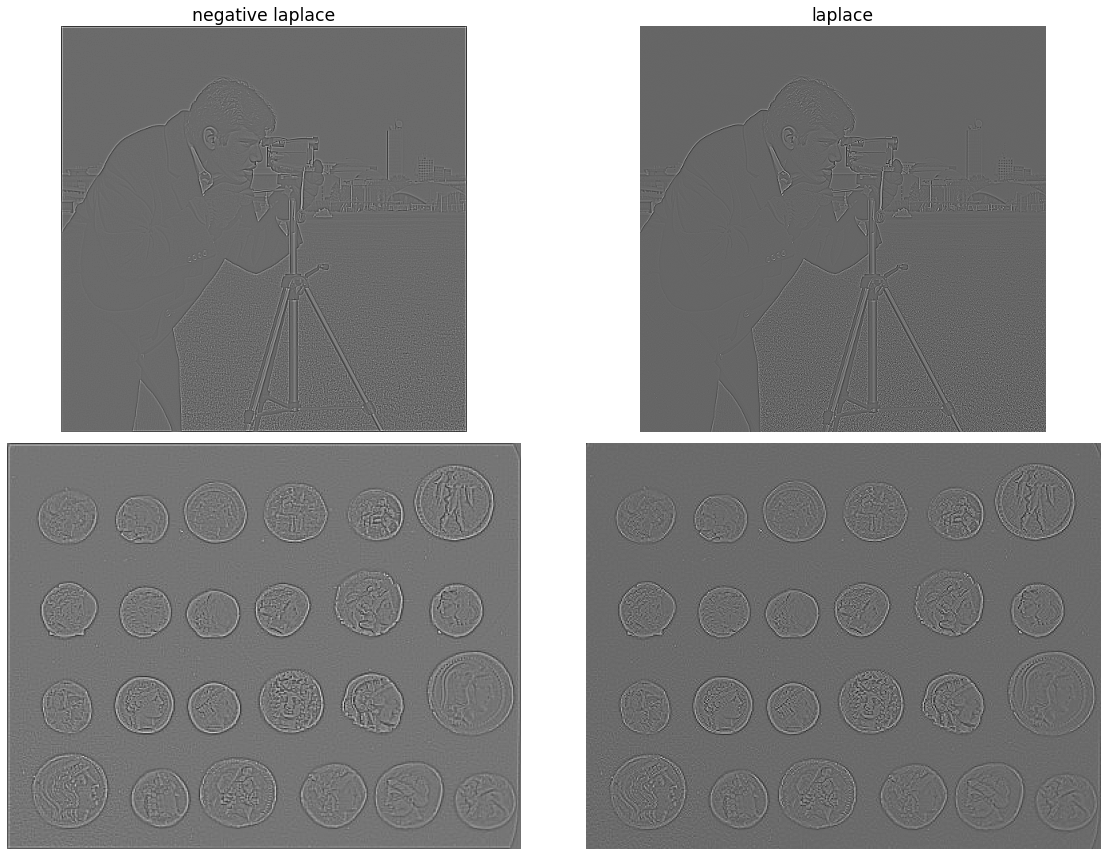

In [6]:
# compare filter_c(negative Laplace filter) to Laplace filter
camera_lplc = filters.laplace(camera)
coins_lplc = filters.laplace(coins)

plt.figure(figsize=(17, 12))
plt.subplot(221)
plt.title('negative laplace', fontsize='xx-large')
plt.imshow(camera_c)
plt.axis('off')
plt.subplot(222)
plt.title('laplace', fontsize='xx-large')
plt.imshow(camera_lplc)
plt.axis('off')
plt.subplot(223)
plt.imshow(coins_c)
plt.axis('off')
plt.subplot(224)
plt.imshow(coins_lplc)
plt.axis('off')

plt.tight_layout()
plt.show()

## B. Denoising a Picture

(189, 266, 3) float64


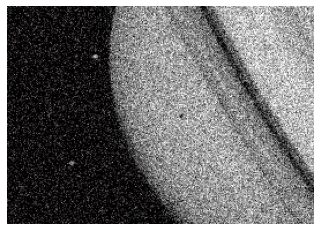

In [8]:
noisy = io.imread('Saturn.jpg')
noisy = img_as_float(noisy)
print(noisy.shape, noisy.dtype)
plt.imshow(noisy)
plt.axis('off')
plt.show()

In [9]:
# Mean filter
mean_1 = mean(img_as_ubyte(noisy), cube(3))
mean_2 = mean(mean_1, cube(3))
mean_3 = mean(mean_2, cube(3))

In [10]:
# Gaussian filter
gauss_1 = filters.gaussian(noisy, multichannel=True)
gauss_2 = filters.gaussian(gauss_1, multichannel=True)
gauss_3 = filters.gaussian(gauss_2, multichannel=True)

In [12]:
# Total variation filter
tv_1 = denoise_tv_chambolle(noisy, multichannel=True)
tv_2 = denoise_tv_chambolle(tv_1, multichannel=True)
tv_3 = denoise_tv_chambolle(tv_2, multichannel=True)

In [13]:
# Bilateral filter
bilat_1 = denoise_bilateral(noisy, multichannel=True)
bilat_2 = denoise_bilateral(bilat_1, multichannel=True)
bilat_3 = denoise_bilateral(bilat_2, multichannel=True)

In [14]:
# Wavelet denoising filter
wavelet_1 = denoise_wavelet(noisy, multichannel=True)
wavelet_2 = denoise_wavelet(wavelet_1, multichannel=True)
wavelet_3 = denoise_wavelet(wavelet_2, multichannel=True)

c:\Users\88697\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\88697\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


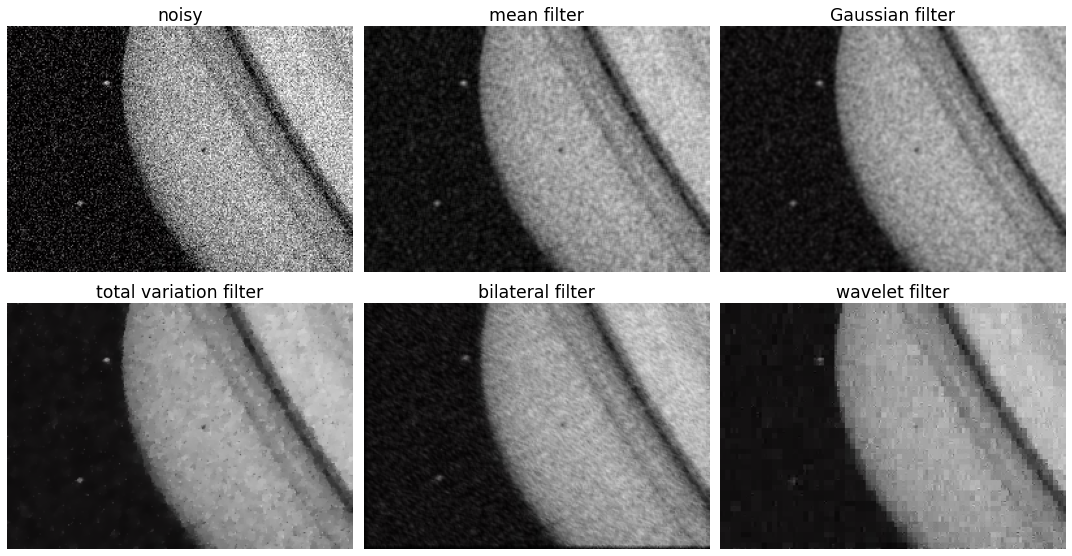

In [15]:
ftrs = [
    noisy, mean_1, gauss_1,
    tv_1, bilat_1, wavelet_1
]

titles = [
    'noisy', 'mean filter', 'Gaussian filter',
    'total variation filter', 'bilateral filter', 'wavelet filter'
]

fig, ax = plt.subplots(2, 3, figsize=(15, 8))
axr = ax.ravel()

for i in range(6):
    axr[i].imshow(ftrs[i])
    axr[i].set_title(titles[i], fontsize='xx-large')
    axr[i].axis('off')

plt.tight_layout()
plt.savefig('filters.jpg')    
plt.show()

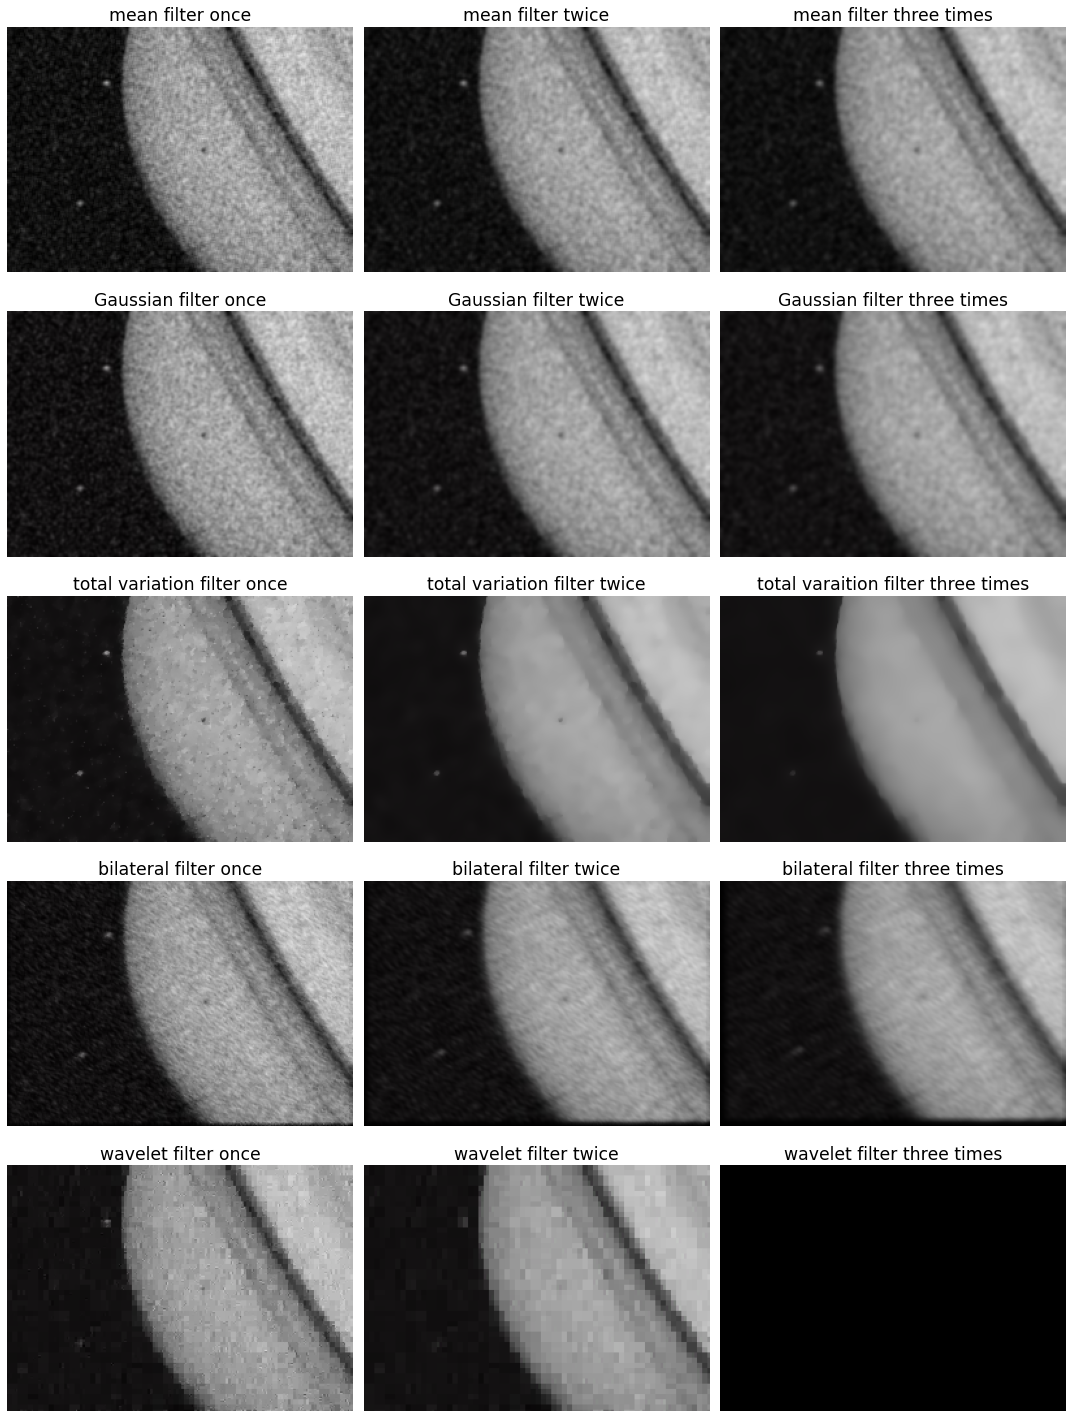

In [16]:
ftrs = [
    mean_1, mean_2, mean_3,
    gauss_1, gauss_2, gauss_3,
    tv_1, tv_2, tv_3,
    bilat_1, bilat_2, bilat_3,
    wavelet_1, wavelet_2, wavelet_3,
]
titles = [
    'mean filter once', 'mean filter twice', 'mean filter three times', 
    'Gaussian filter once', 'Gaussian filter twice', 'Gaussian filter three times', 
    'total variation filter once', 'total variation filter twice', 'total varaition filter three times', 
    'bilateral filter once', 'bilateral filter twice', 'bilateral filter three times', 
    'wavelet filter once', 'wavelet filter twice', 'wavelet filter three times'
]

fig, ax = plt.subplots(5, 3, figsize=(15, 20))
axr = ax.ravel()

for i in range(15):
    axr[i].imshow(ftrs[i])
    axr[i].set_title(titles[i], fontsize='xx-large')
    axr[i].axis('off')

plt.tight_layout()
plt.savefig('filter_times.jpg')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


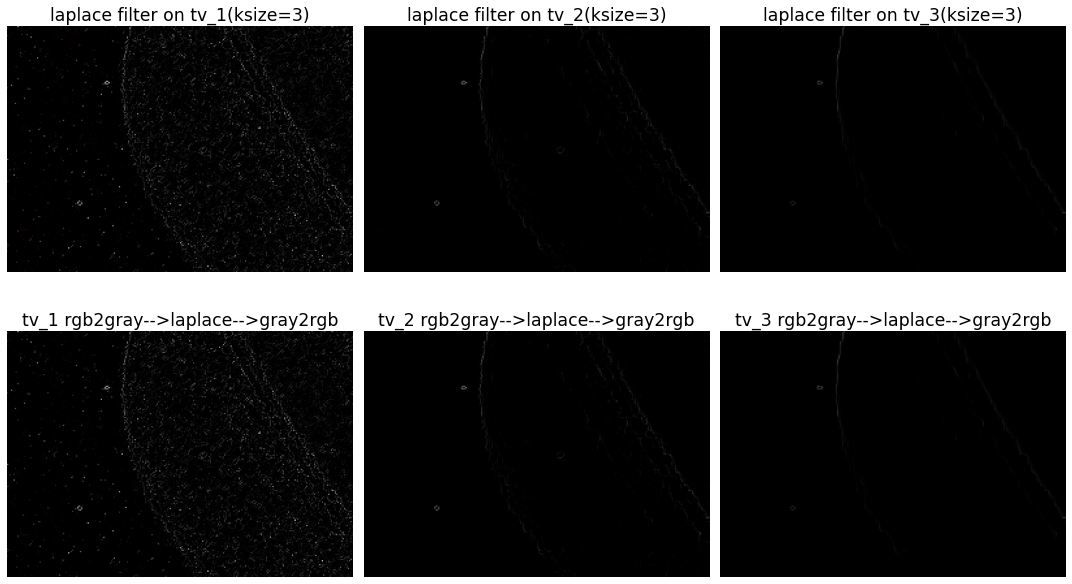

In [17]:
# edge for sharpening
edge_1 = filters.laplace(tv_1, ksize=3)
edge_2 = filters.laplace(tv_2, ksize=3)
edge_3 = filters.laplace(tv_3, ksize=3)
edge_4 = gray2rgb(filters.laplace(rgb2gray(tv_1), ksize=3))
edge_5 = gray2rgb(filters.laplace(rgb2gray(tv_2), ksize=3))
edge_6 = gray2rgb(filters.laplace(rgb2gray(tv_3), ksize=3))

edges = [
    edge_1, edge_2, edge_3, 
    edge_4, edge_5, edge_6
]

titles = [
    'laplace filter on tv_1(ksize=3)', 
    'laplace filter on tv_2(ksize=3)', 
    'laplace filter on tv_3(ksize=3)',
    'tv_1 rgb2gray-->laplace-->gray2rgb', 
    'tv_2 rgb2gray-->laplace-->gray2rgb', 
    'tv_3 rgb2gray-->laplace-->gray2rgb'
]

fig, axes = plt.subplots(2, 3, figsize=(15, 9))
ax = axes.ravel()

for i in range(6):
    ax[i].imshow(edges[i])
    ax[i].set_title(titles[i], fontsize='xx-large')
    ax[i].axis('off')
    
plt.tight_layout()
plt.savefig('edges.jpg')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


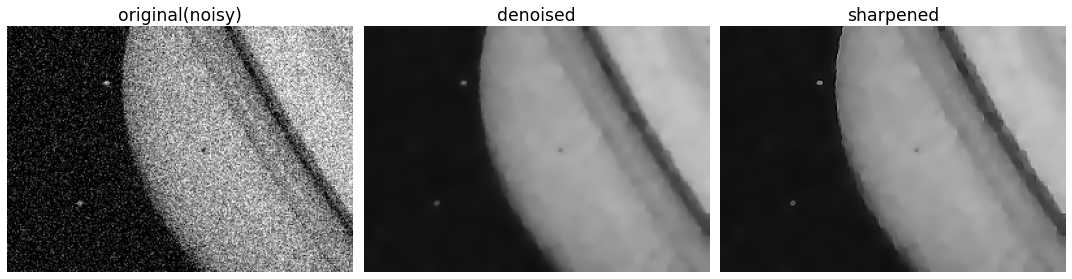

In [18]:
denoised = tv_2.copy()
edges = edge_6.copy()
sharpened = denoised + edges

result = [noisy, denoised, sharpened]
titles = ['original(noisy)', 'denoised', 'sharpened']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
ax = axes.ravel()

for i in range(3):
    ax[i].imshow(result[i])
    ax[i].set_title(titles[i], fontsize='xx-large')
    ax[i].axis('off')
    
plt.tight_layout()
plt.savefig('final_result.jpg')
plt.show()

## C. Properties of Convolution

## D. Image Segmentation and Color Space

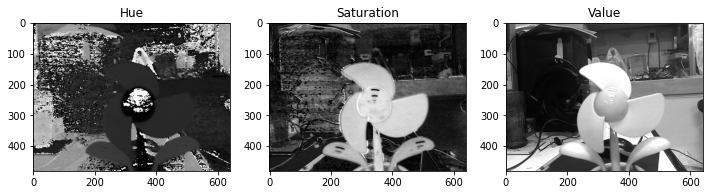

In [16]:
img = io.imread("YellowFan.png")
img_hsv = rgb2hsv(img);

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(img_hsv[:,:,0], cmap='gray')
ax[0].set_title('Hue')
ax[1].imshow(img_hsv[:,:,1], cmap='gray')
ax[1].set_title('Saturation')
ax[2].imshow(img_hsv[:,:,2], cmap='gray')
ax[2].set_title('Value')

plt.show()

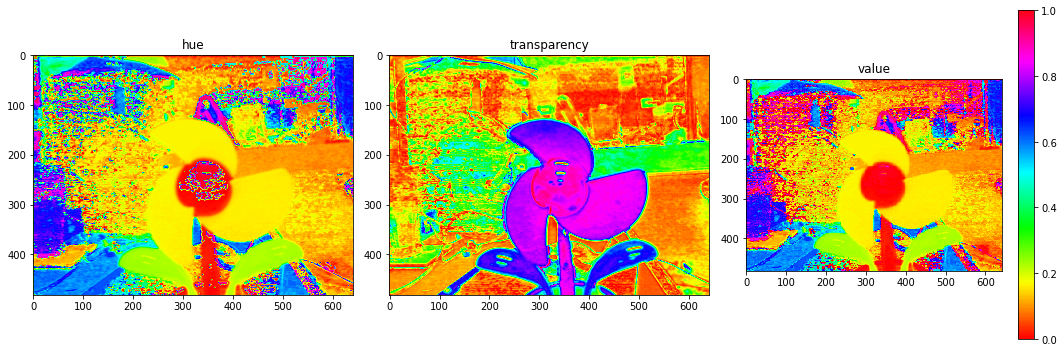

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(img_hsv[:,:,0],cmap='hsv')
ax[0].set_title('hue')
ax[1].imshow(img_hsv[:,:,1],cmap='hsv')
ax[1].set_title('transparency')
ax[2].imshow(img_hsv[:,:,2],cmap='hsv')
ax[2].set_title('value')
fig.colorbar(io.imshow(img_hsv[:,:,0],cmap='hsv')) 
fig.tight_layout()

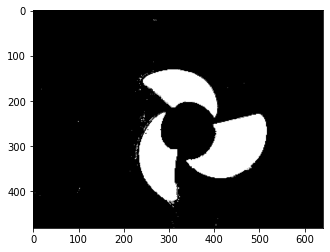

In [97]:
lower_mask = img_hsv[:,:,0] > 0.1475
upper_mask = img_hsv[:,:,0] < 0.1725
saturation_mask = img_hsv[:,:,1] > 0.65

mask = lower_mask*upper_mask*saturation_mask

plt.imshow(mask)
plt.show()

## E. Document Scanner

In [1]:
def scan_document(img):
    
    img = img.copy()

    src = np.array([[0, 0], [400, 0], [0, 800], [400, 800]])
    dst = np.array([[120, 178],  # upper left
                    [275, 170],  # upper right
                    [63, 527],  # bottom left
                    [310, 532]])  # bottom right

    tform3 = transform.ProjectiveTransform()
    tform3.estimate(src, dst)

    warped = transform.warp(img, tform3, output_shape=(800, 400))

    warped_gray = skimage.color.rgb2gray(warped)

    window_size = 25
    thresh_sauvola = filters.threshold_sauvola(warped_gray, window_size=window_size, k=0.1)
    scanned = warped_gray > thresh_sauvola

    return scanned

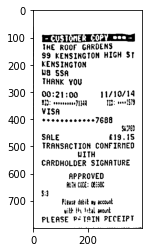

In [6]:
img = io.imread('invoice.jpg')
scanned = scan_document(img)
plt.imshow(scanned, cmap='gray')
plt.show()